In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

Data Collection and analysis

In [4]:
#loading data from csv
customer_df= pd.read_csv('/content/Mall_Customers.csv')

In [5]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_df.shape

(200, 5)

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the Annual Income Column & Spending Score column

In [12]:
X = customer_df.iloc[:,[3,4]].values

In [13]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [14]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

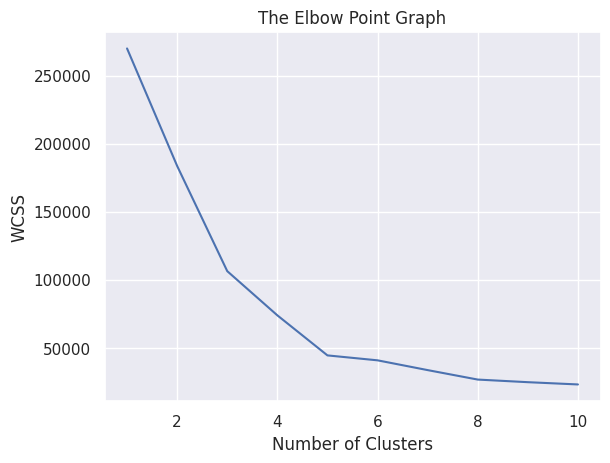

In [15]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

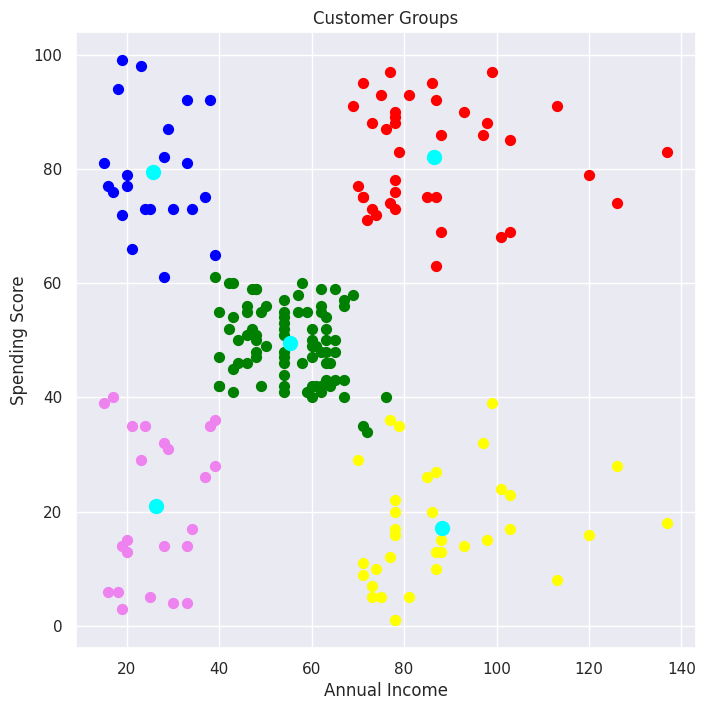

In [18]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

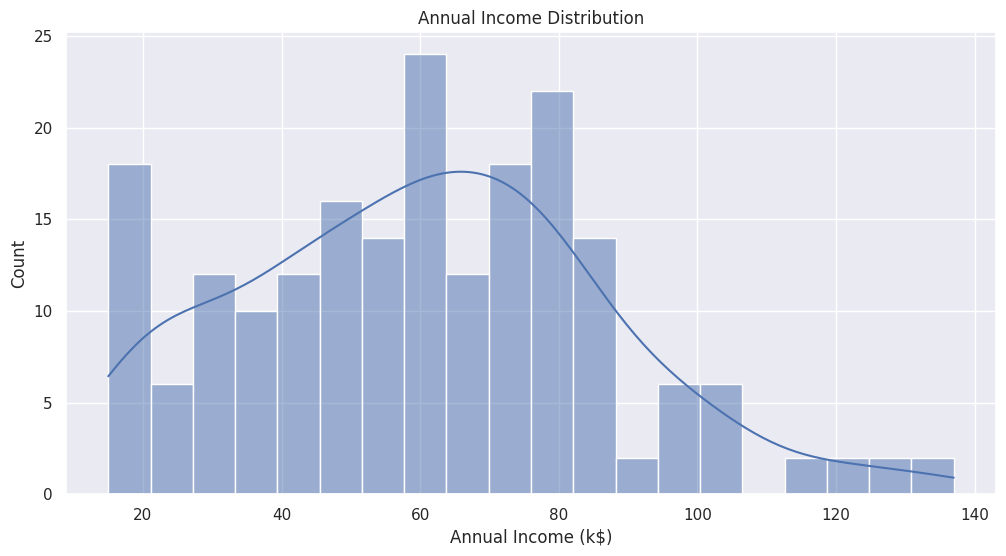

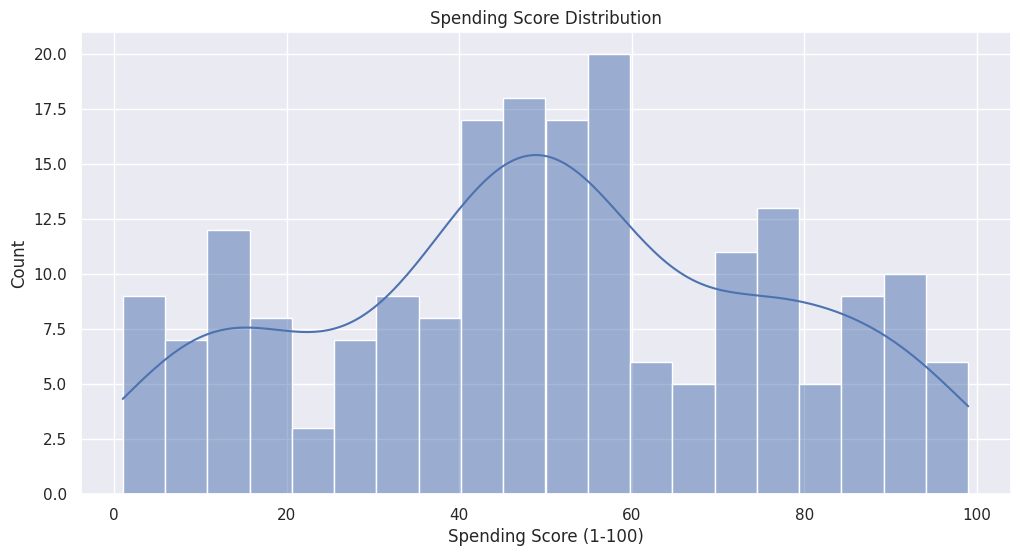

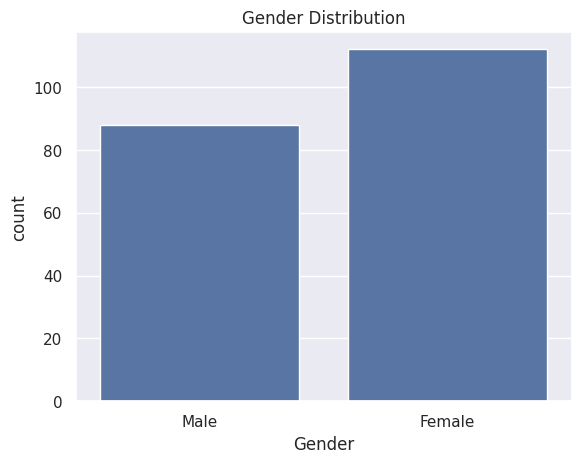

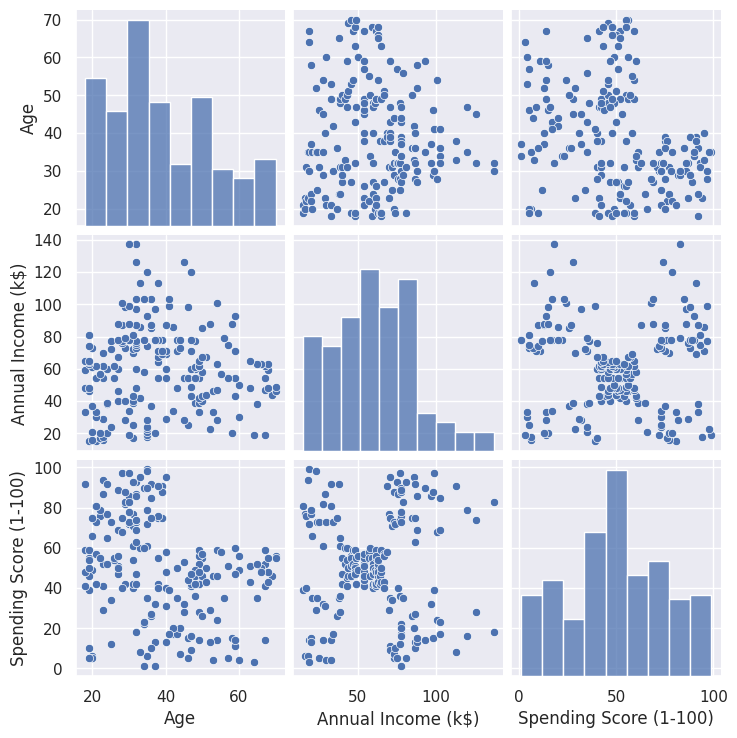

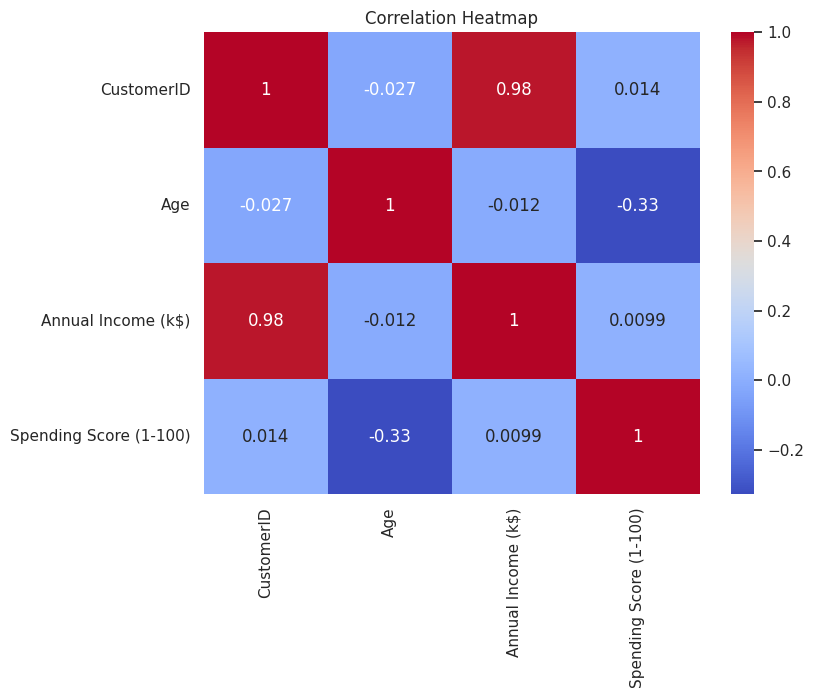

In [21]:
# Basic statistics
customer_df.describe()

# Distribution plots
plt.figure(figsize=(12,6))
sns.histplot(customer_df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(customer_df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Gender distribution
sns.countplot(x='Gender', data=customer_df)
plt.title("Gender Distribution")
plt.show()

# Relationship between Age, Income and Spending
sns.pairplot(customer_df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(customer_df.drop('Gender', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

# Silhouette score for 5 clusters
score = silhouette_score(X, Y)
print("Silhouette Score for KMeans (k=5):", score)


Silhouette Score for KMeans (k=5): 0.553931997444648


Hierarchical Clustering

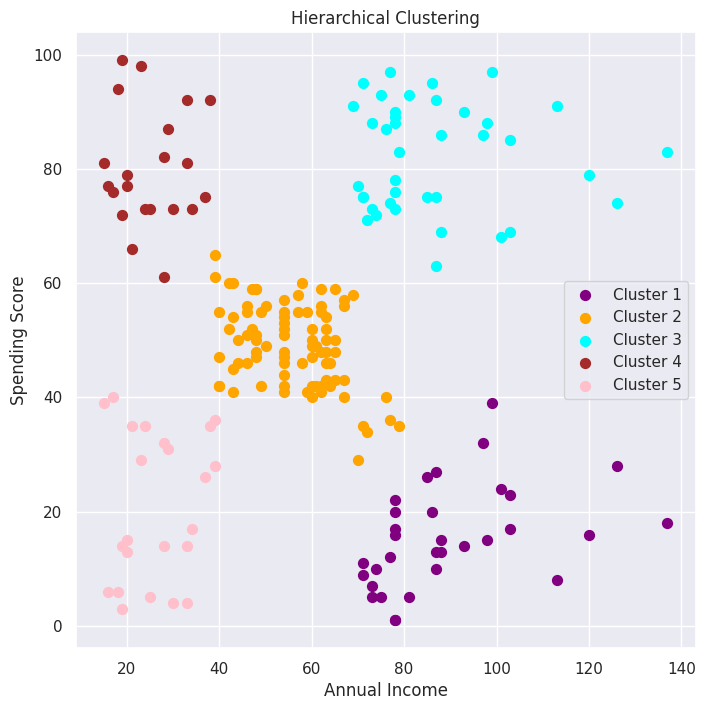

In [24]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=50, c='purple', label='Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=50, c='cyan', label='Cluster 3')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s=50, c='brown', label='Cluster 4')
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], s=50, c='pink', label='Cluster 5')
plt.title("Hierarchical Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

DBSCAN

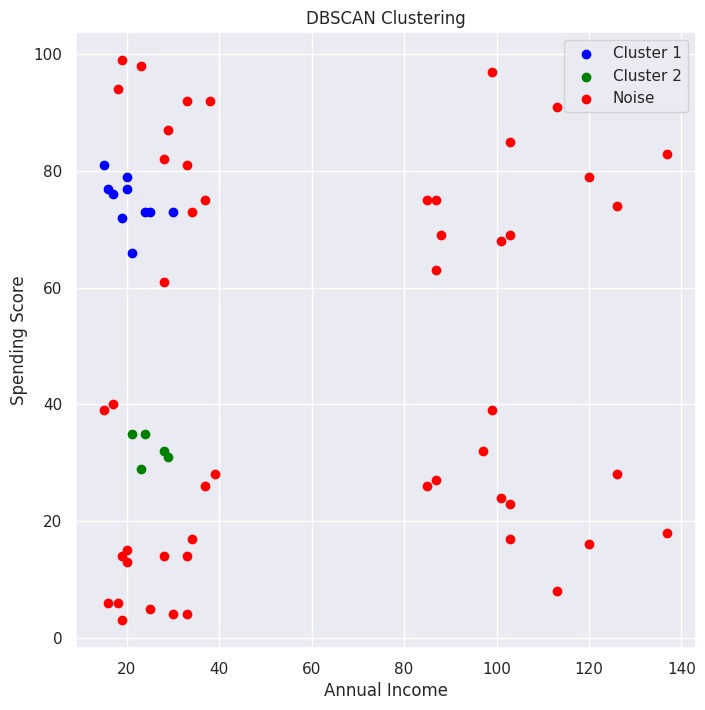

In [25]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=7, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan==0,0], X[y_dbscan==0,1], c='blue', label='Cluster 1')
plt.scatter(X[y_dbscan==1,0], X[y_dbscan==1,1], c='green', label='Cluster 2')
plt.scatter(X[y_dbscan==-1,0], X[y_dbscan==-1,1], c='red', label='Noise')
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


Dimensionality Reduction (PCA / t-SNE)

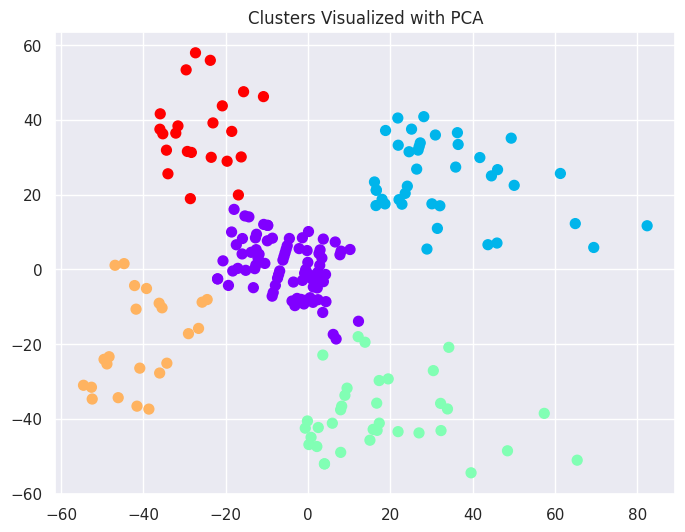

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap='rainbow', s=50)
plt.title("Clusters Visualized with PCA")
plt.show()


Model Evaluation (Compare Cluster Quality)

In [27]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X, Y))
print("Calinski Harabasz Score:", calinski_harabasz_score(X, Y))
print("Davies Bouldin Score:", davies_bouldin_score(X, Y))


Silhouette Score: 0.553931997444648
Calinski Harabasz Score: 247.35899338037282
Davies Bouldin Score: 0.5725628995597083


In [28]:
import pickle

# Save model
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

# Load model later
with open("kmeans_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Predict with loaded model
print(loaded_model.predict([[40,70]]))  # Example input


[4]


In [30]:
import numpy
print(numpy.__version__)

2.0.2


In [31]:
import sklearn
print(sklearn.__version__)

1.6.1
